## 머신러닝 과정
1. 데이터 획득
1. 데이터 정제
1. 데이터 분석
    - corr()로 상관분석해서, fit이 가능한지 확인
    - 어떤 모델이 적합한지, 어떻게 모델링 할지
1. x, y 분리
1. 학습, 검증 분리
1. 모델선택해서, 학습
1. 성능 측정 (예측:결정계수, 분류:정확도)
1. 예측 시각화

### 2가지 종류 동물 분류(2진 분류)
1. 개, 고양이
1. 새
1. 특징 : 다리수, 꼬리 유무

## 선형 모델 : 곱하기와 더하기만으로 만든 선형 방정식으로 x, y 관계를 표현하는 모델
- LinearRegression : Y=WX+b
- LogistRegression : Y=sigmoid(WX+b) ( sigmoid = 1/(a+exp(z)) )

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
x = [[4, 1], [4, 1], [2, 1]]
y = [0, 0, 1]

In [10]:
from sklearn.linear_model import LogisticRegression

In [5]:
model = LogisticRegression().fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
model.coef_, model.intercept_, model.score(x, y)

(array([[-0.4337917 ,  0.19915754]]), array([0.19915754]), 0.6666666666666666)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression().fit(x, y)

In [13]:
model.coef_, model.intercept_, model.score(x, y)

(array([-0.5,  0. ]), 2.000000000000001, 1.0)

In [14]:
np.sum(model.coef_ * x, axis=1) + model.intercept_

array([0., 0., 1.])

# 그리드 서치 - tensorflow로 LinearRegression 구현

In [68]:
#tensorflow로 LinearRegression 구현
w = tf.Variable([0.1, 0.1])
b = tf.Variable(0.0)
h = tf.reduce_sum(w * tf.cast(x, tf.float32), axis=1) + b # 모든 타입이 동일해야 연산이 가능
cost = tf.square(tf.square(h - y))
opt = tf.train.GradientDescentOptimizer(0.01)
trainOperation = opt.minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer()) #모든 Variable 초기화

In [102]:
for i in range(100):
    _, _c, _h = sess.run([trainOperation, cost, h])
_c, _h

(array([0.00016362, 0.00016362, 0.00087766], dtype=float32),
 array([0.11309993, 0.11309993, 0.82787997], dtype=float32))

# Y = wx + b = h(x)
## h(x) = transpose(w==theta).x

- 총 급여 계산하기
- 평일에 일을 하면, 시급 1만원
- 주말에 일을 하면, 시급 1만 2천원
- 3사람이 있습니다.
- [10, 5] : 평일 10시간, 주말 5시간

In [118]:
# 총 급여 = 시급(theta) * 일한 시간(x)
x1 = [10, 5]
x2 = [20, 10]
x3 = [30, 15]
X = [x1, x2, x3]
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
X = np.array(X)

In [119]:
# 세 사람의 급여 구하기
w = [10000, 12000]
w = np.array(w)
np.sum(w*X, axis=1)

array([160000, 320000, 480000])

In [120]:
w.shape, X.shape

((2,), (3, 2))

In [121]:
np.matmul(w, np.transpose(X, [1, 0]))

array([160000, 320000, 480000])

In [122]:
X

array([[10,  5],
       [20, 10],
       [30, 15]])

In [124]:
np.transpose(X, [1, 0])

array([[10, 20, 30],
       [ 5, 10, 15]])

# 정규 방정식 구현

In [150]:
x = 2 * np.random.rand(100, 1)

In [151]:
y = 4 + 3*x + np.random.rand(100, 1)

In [152]:
one = np.ones_like(x)
x = np.concatenate((x, one), axis=1)
x.shape

(100, 2)

In [153]:
import matplotlib.pyplot as plt

In [154]:
# theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)
theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
theta

array([[3.09178347],
       [4.39184614]])

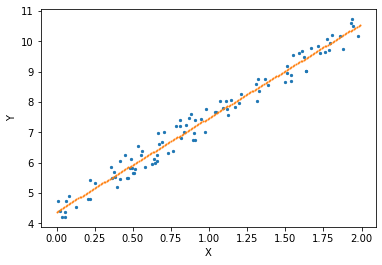

In [156]:
plt.scatter(x[:,0], y, s = 5)
plt.xlabel('X')
plt.ylabel('Y')
_x = np.arange(0, 2, 0.01)
_y = theta[0, 0]* _x + theta[1, 0]
plt.scatter(_x, _y, s=1)

# 경사하강법 구현
### y = wx + b 에서 w를 경사하강법으로 fit하기

In [1847]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3*x + np.random.rand(100, 1)

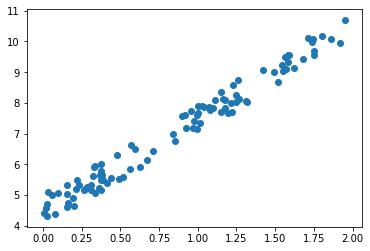

In [1848]:
plt.scatter(x, y)

In [2610]:
w = 1.5
b =1
h = w*x
cost = np.mean((h - y)**2)

- cost = np.mean((h-y)**2)
- cost = np.mean(((w*x+b)-y)**2)
- cost = np.mean((w*x+b-y)**2)
- cost = (w*x+b-y)**2

- cost를 w로 미분 => 경사
- cost = f(g(x)), g(x) = w*x+b-y, f(x) = g(x)**2
- f(g(x))를 x로 미분 = f'*g(x) * g'(x)
- f(g(x))를 w로 미분 = 2*(w*x+b-y)*x

- cost를 b로 미분 
- cost = f(g(x)), g(x) = w*x+b-y, f(x) = g(x)**2
- f(g(x))를 b로 미분 = f'*g(x) * g'(x)
- f(g(x))를 b로 미분 = 2*(w*x+b-y)

In [4001]:
learning_rate = 0.01
gradient_w = np.mean(2*(w*x-y) * x)
gradient_b = np.mean(2*(w*x-y) * 1)
w = w - learning_rate * gradient_w
b = b - learning_rate * gradient_b
w,   b

(6.681250778054214, 42.25176549800563)

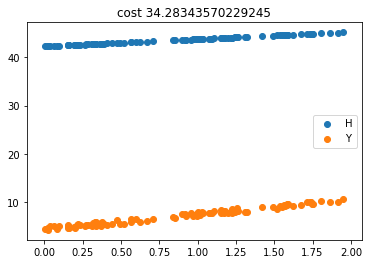

In [4003]:
plt.title('cost ' + str(cost))
plt.scatter(x, h+b, label='H')
plt.scatter(x, y, label='Y')
plt.legend()

In [5897]:
x1 = 2 * np.random.rand(100, 1) / 2 # 정규화
x2 = 1 * np.random.rand(100, 1)
noize = np.random.rand(100, 1)
y = 3 * x1**2 + 2*x2 + noize

# 모델로 x1, x2, y의 관례를 방정식으로 표현
### 비선형방정식 y = w1*x1**2 + w2*x2 + b

In [5898]:
# 경사 하강법은 초기값을 선택해야 합니다. 매우 자알~~~~~ + 초기값 + 학습률
w1 = 0.1
w2 = 0.1
b = 0

In [7198]:
h = w1 * x1 **2 + w2 * x2 + b
# 코스트 함수를 핏팅하려는 파라미터로 미분하면 기울기가 나오는데,
# 핏팅하려는 파라미터에서, 그 기울기만큼 빼주면 된다.
cost = np.mean((h - y) ** 2)
learning_rate = 0.01 # 매우 자알 잡아야 합니당
z = h - y
w1 = w1 - learning_rate * np.mean((2*z)*(x1**2))
w2 = w2 - learning_rate * np.mean((2*z)*(x2))
b = b - learning_rate * np.mean((2*z)*(1))
cost, w1, w2, b

(0.09720063495796252, 2.812102005598813, 1.811866927465305, 0.7167841307602296)

- cost = (h-y)**2, z = g(w1) = h - y = w1*x1**2 + w2*w2 + b , f(z) = z**2
  
- cost : ((h-y)**2) 를 w1 으로 미분하자
  (2*z)*(x1**2)
- cost : ((h-y)**2) 를 w2 으로 미분하자
  (2*z)*(x2)
- cost : ((h-y)**2) 를 b 으로 미분하자
  (2*z)*1

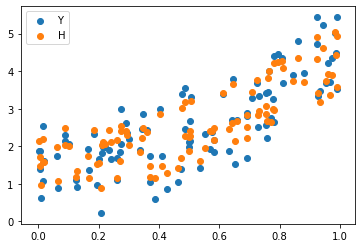

In [7199]:
plt.scatter(x1, y, label = 'Y')
plt.scatter(x1, h, label = 'H')
plt.legend()

In [5896]:
np.max(x1), np.max(x2), np.min(x1), np.min(x2)

(1.998612732506775,
 0.9951379294854011,
 0.01233824013484286,
 0.010438595604082113)

# 다항회귀

In [7266]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**3 + x + 2 + np.random.randn(m, 1)

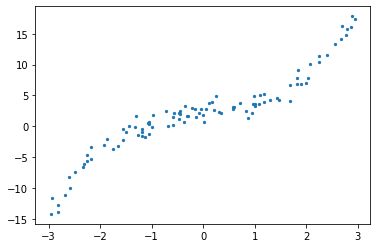

In [7267]:
plt.scatter(x, y, s=5)

In [7268]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 3, include_bias=False)
x_poly = pf.fit_transform(x)
x.shape, x_poly.shape, pf.get_feature_names()

((100, 1), (100, 3), ['x0', 'x0^2', 'x0^3'])

In [7269]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_poly, y)
model_basic = LinearRegression().fit(x, y)

In [7270]:
np.sum(x[:, 0] - x_poly[:, 0])

0.0

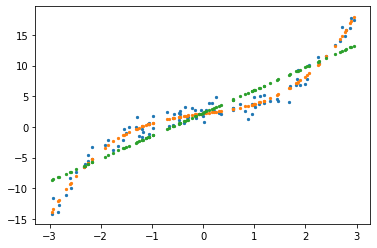

In [7271]:
plt.scatter(x, y, s=5)
plt.scatter(x, model.predict(x_poly), s=5)
plt.scatter(x, model_basic.predict(x), s=5)

# 10차 다항곡선

In [7272]:
from sklearn.pipeline import Pipeline

In [7279]:
pipe = Pipeline([
    ('feature', PolynomialFeatures(degree=10, include_bias=False)), 
    ('reg', LinearRegression())
])

In [7280]:
pipe.fit(x, y)
pipe.score(x, y)

0.9784550471480767